In [1]:
import numpy as np
import polars as pl
from ShapeSensitivityAnalyzer import ShapeSensitivityAnalyzer as SSA
pl.Config.set_tbl_rows(50)
pl.Config.with_columns_kwargs = True
import matplotlib.pyplot as plt

In [2]:
def apply_all_fns(dataframe, iartd=False):
    colnames = ['x', 'y', 'z', 'delta']
    dataframe.columns = colnames + [f'shape_{i}' for i in range(dataframe.width - 4)]
    if iartd:
        last_col_str_name = dataframe.columns[-1]
        dataframe = dataframe.drop(last_col_str_name)
    dataframe_ssa = SSA(dataframe)
    dataframe_ssa.z_scale_all_data()
    dataframe_ssa.row_norms_per_rotation_nudge()
    dataframe_ssa.average_out_z_rotations()
    return dataframe_ssa

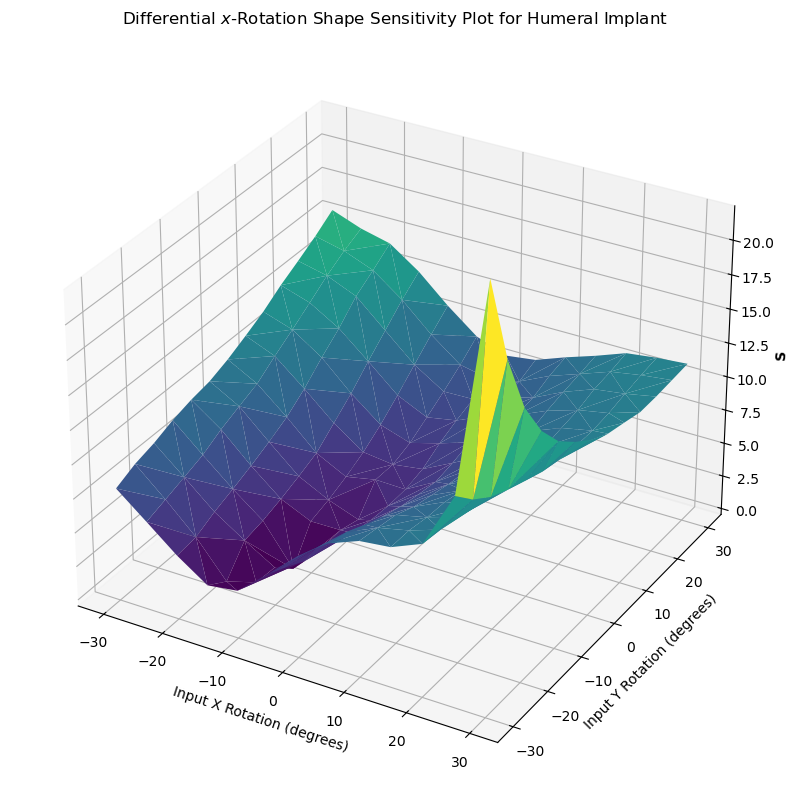

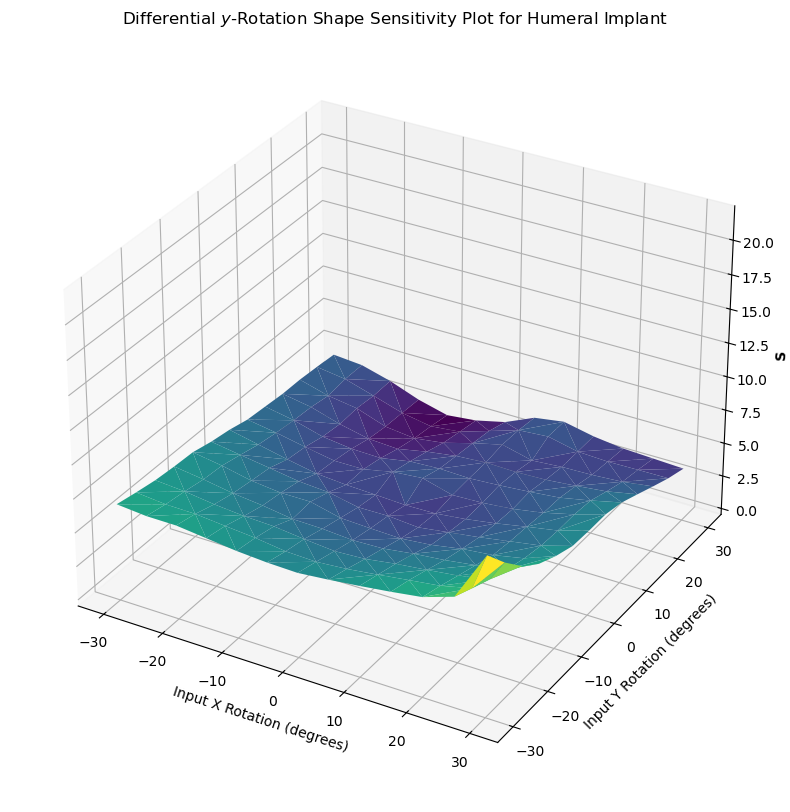

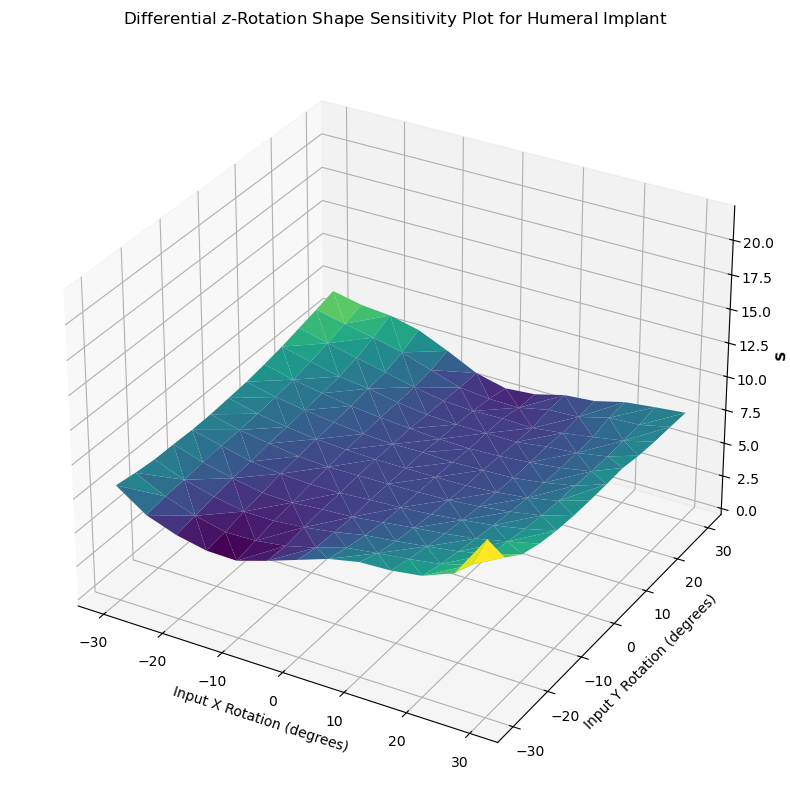

In [3]:
hum_iartd = pl.read_csv('./input_data/iartd-hum.csv', has_header=False)
hum_iartd_ssa = apply_all_fns(hum_iartd,iartd=True)
hum_iartd_ssa.plot_sensitivity_surfaces(implant = "Humeral")


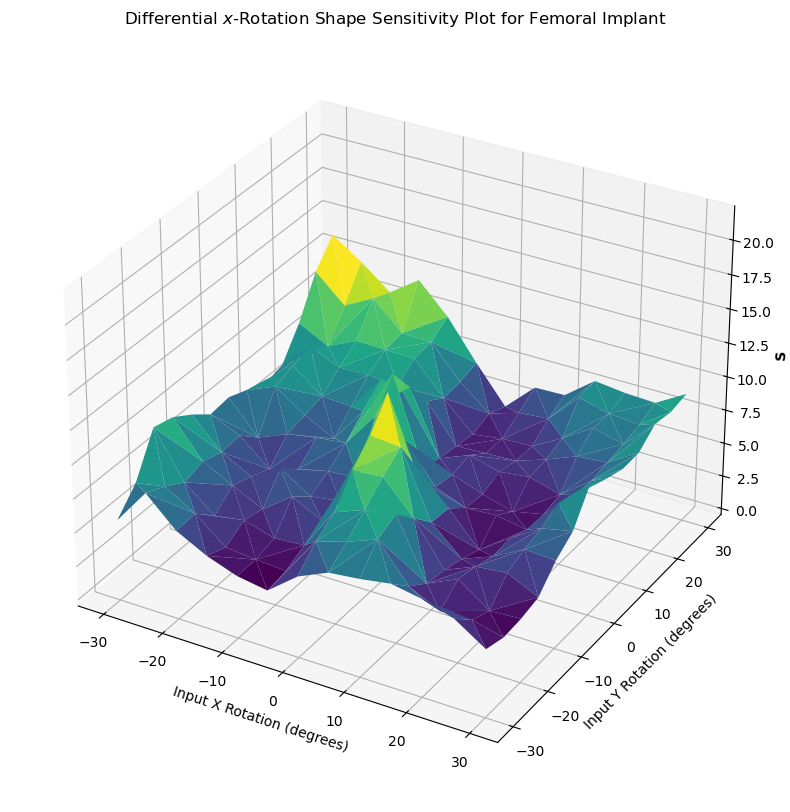

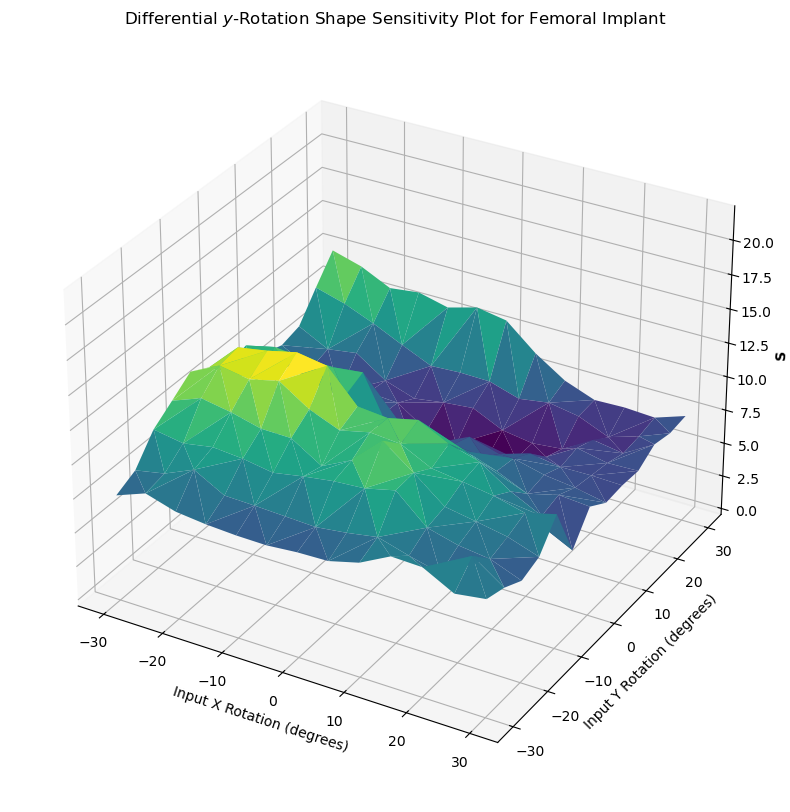

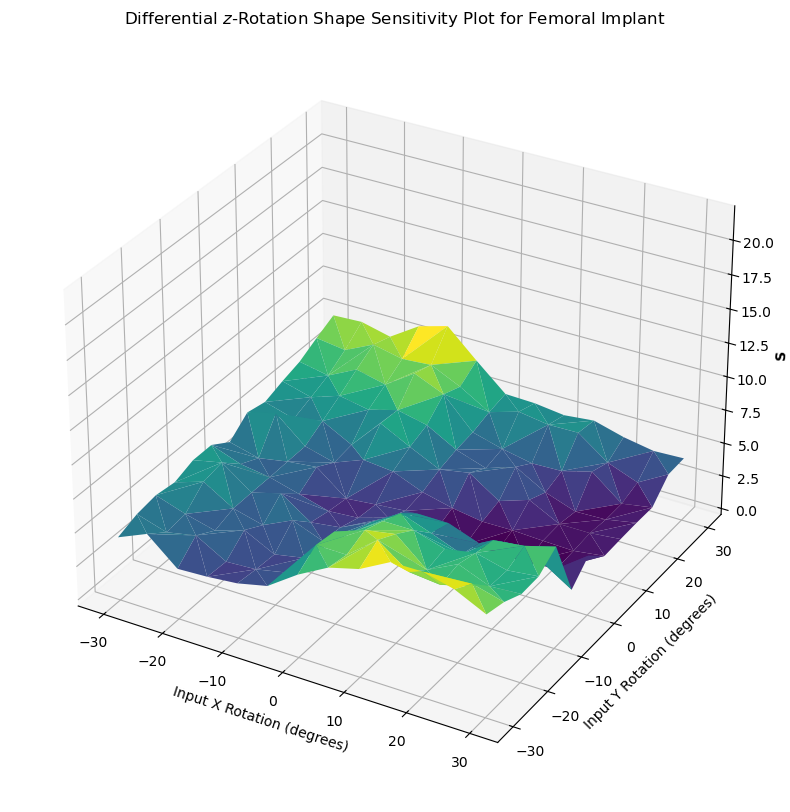

In [4]:
fem_iartd = pl.read_csv('./input_data/iartd-fem.csv', has_header=False)
fem_iartd_ssa = apply_all_fns(fem_iartd,iartd=True)
fem_iartd_ssa.plot_sensitivity_surfaces(implant="Femoral")

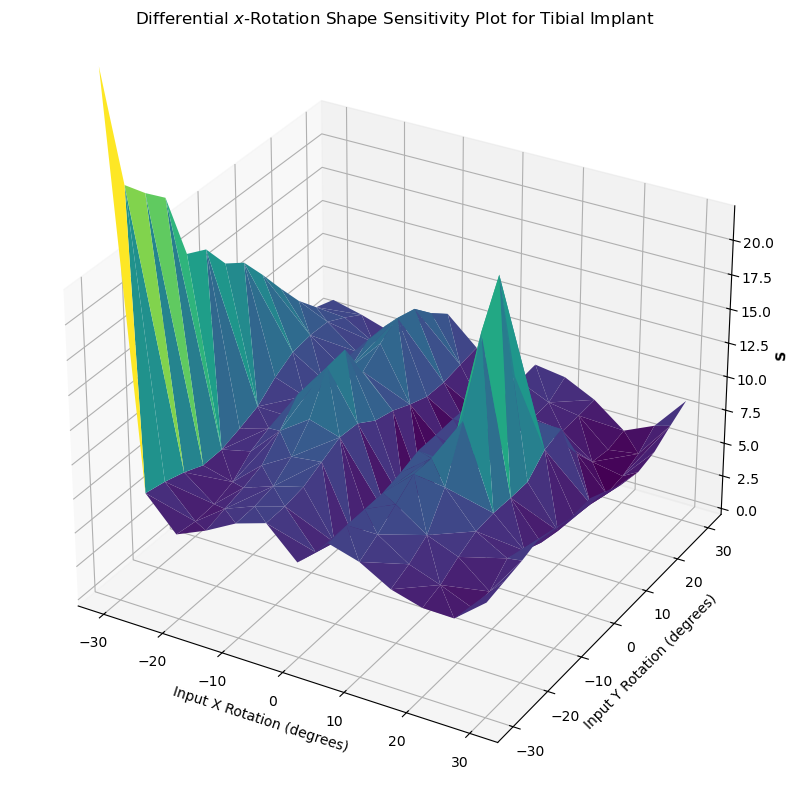

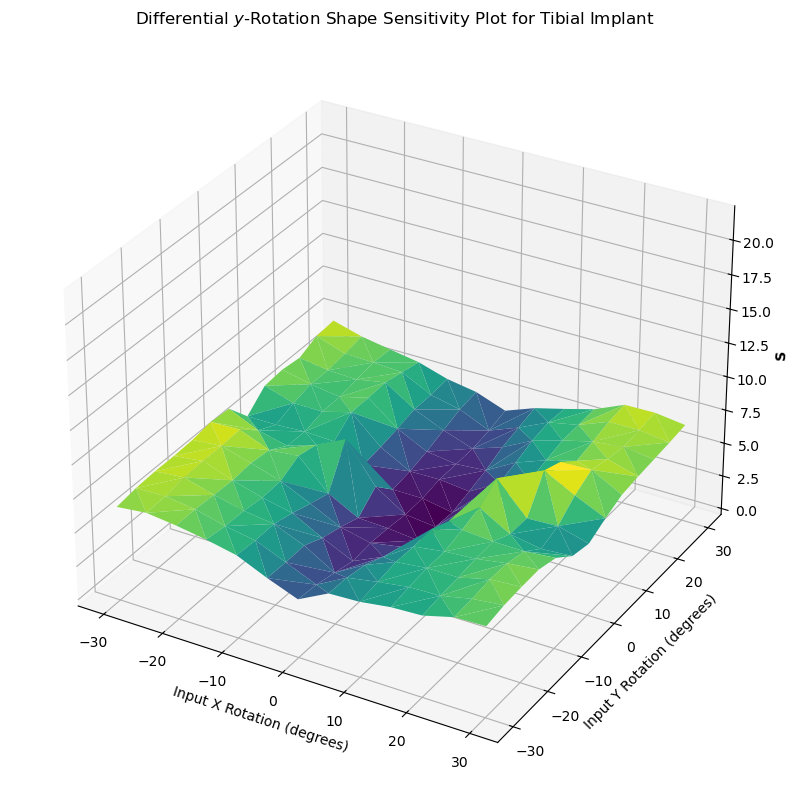

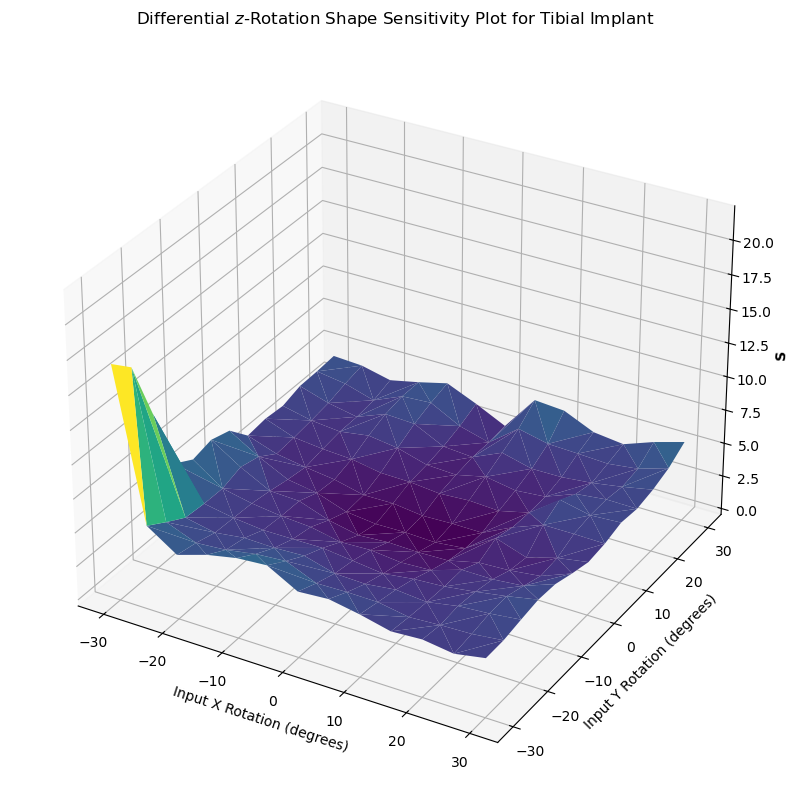

In [5]:
tib_iartd = pl.read_csv('./input_data/iartd-tib.csv', has_header=False)
tib_iartd_ssa = apply_all_fns(tib_iartd,iartd=True)
tib_iartd_ssa.plot_sensitivity_surfaces(implant = "Tibial")

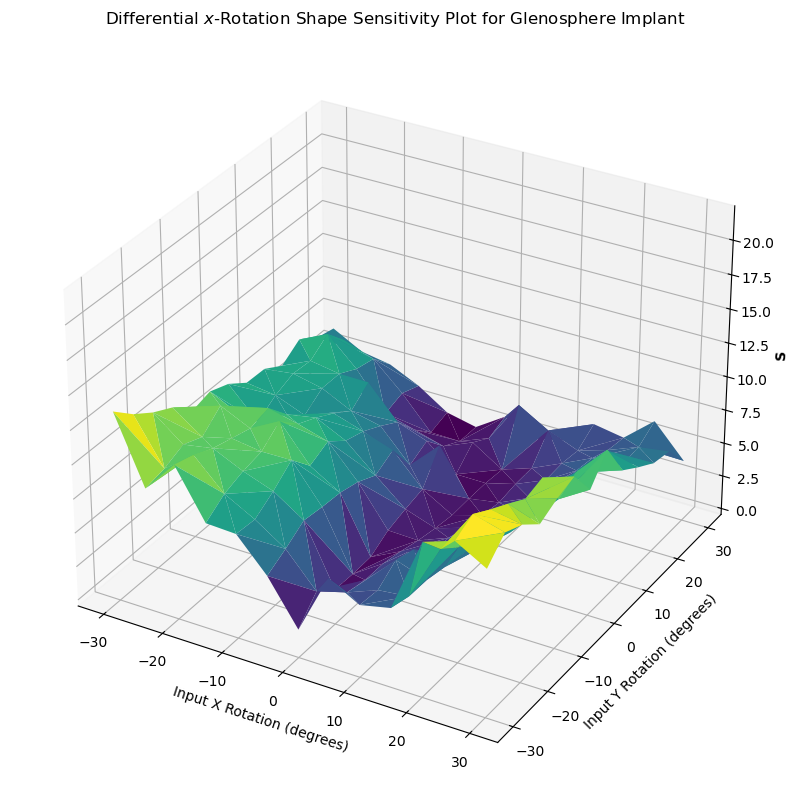

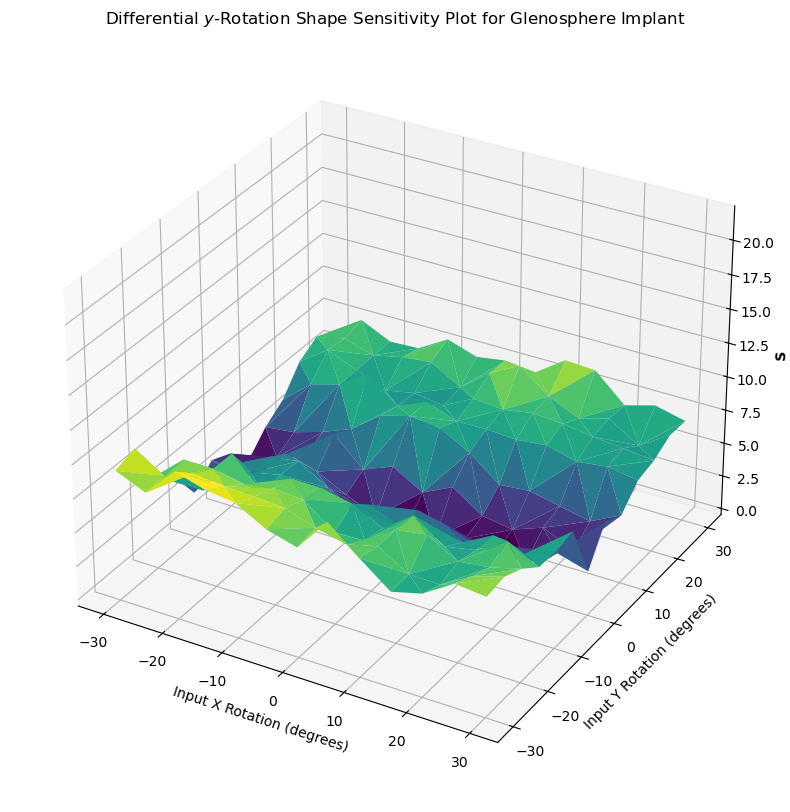

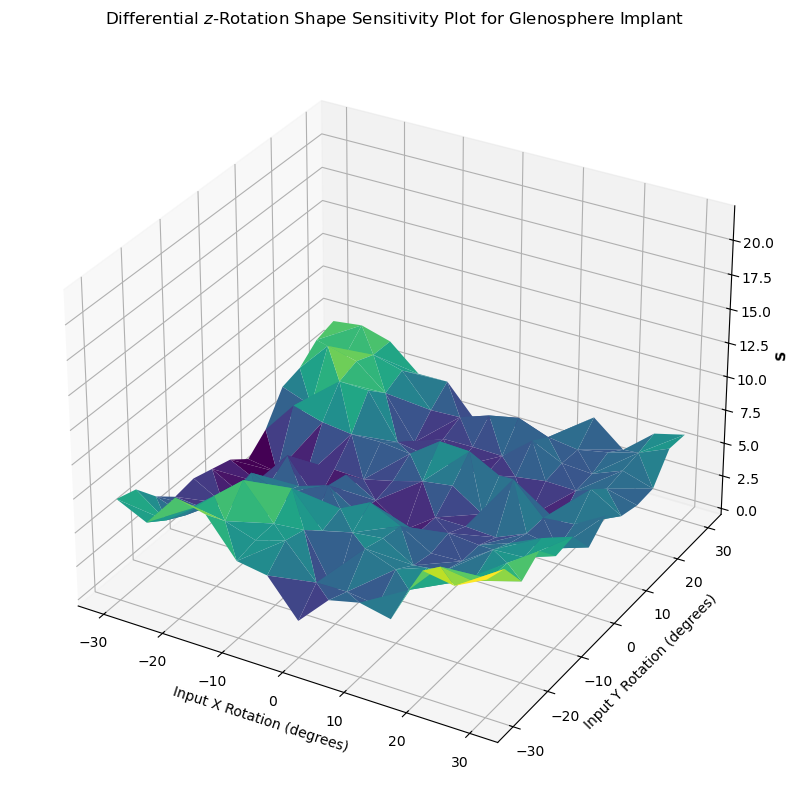

In [6]:
sca_iartd = pl.read_csv('./input_data/iartd-sca.csv', has_header=False)
sca_iartd_ssa = apply_all_fns(sca_iartd,iartd=True)
sca_iartd_ssa.plot_sensitivity_surfaces(implant = "Glenosphere")

In [7]:
hum_hu = pl.read_csv('./input_data/hu_moments-hum.csv', has_header=False)
hum_hu_ssa = apply_all_fns(hum_hu, iartd=True)
hum_hu_ssa.plot_sensitivity_surfaces(max_z=14)

TypeError: ShapeSensitivityAnalyzer.plot_sensitivity_surfaces() missing 1 required positional argument: 'implant'

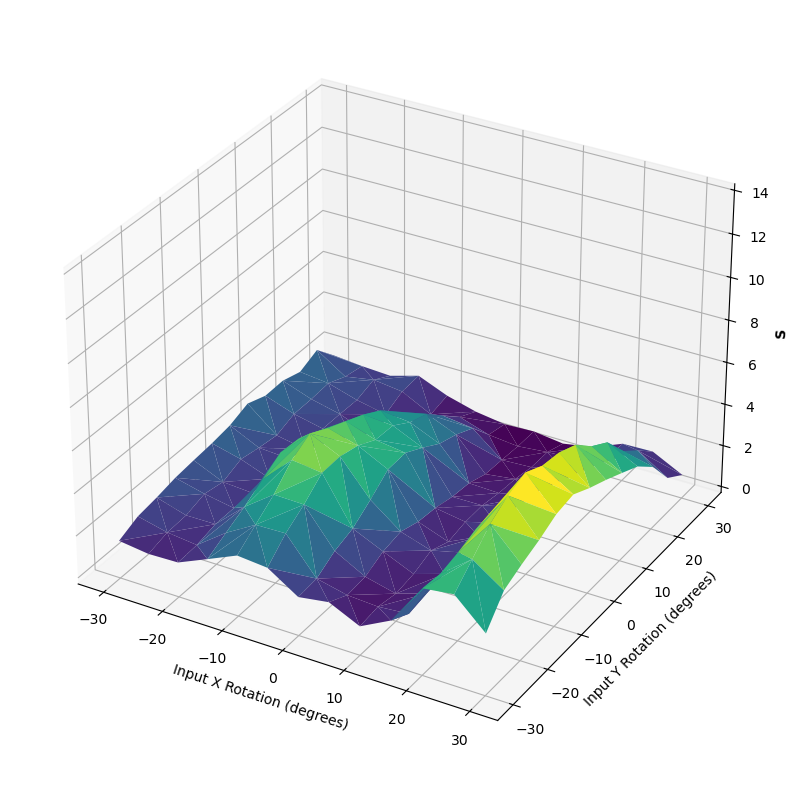

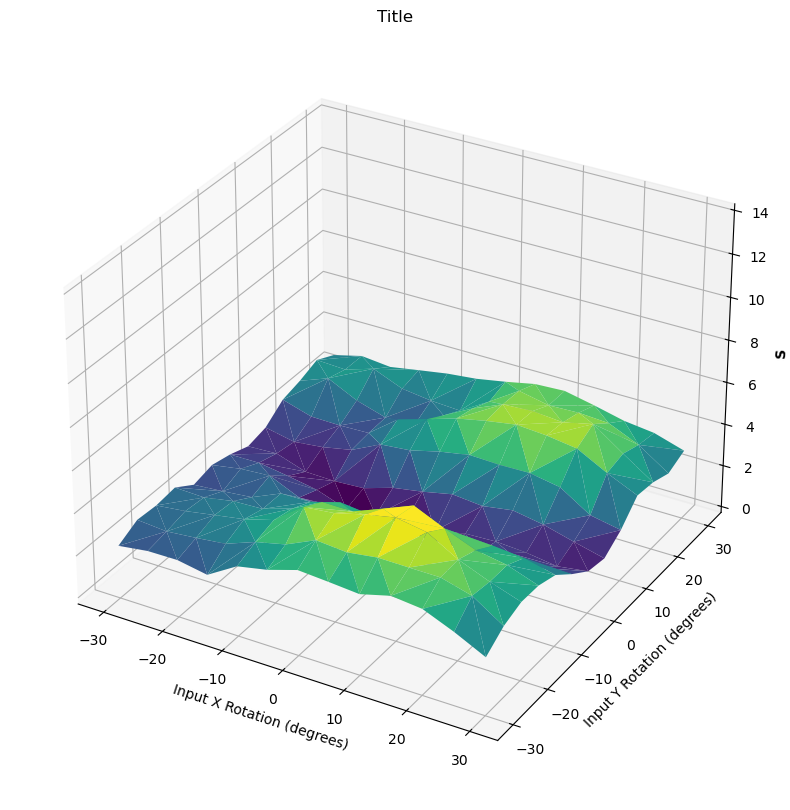

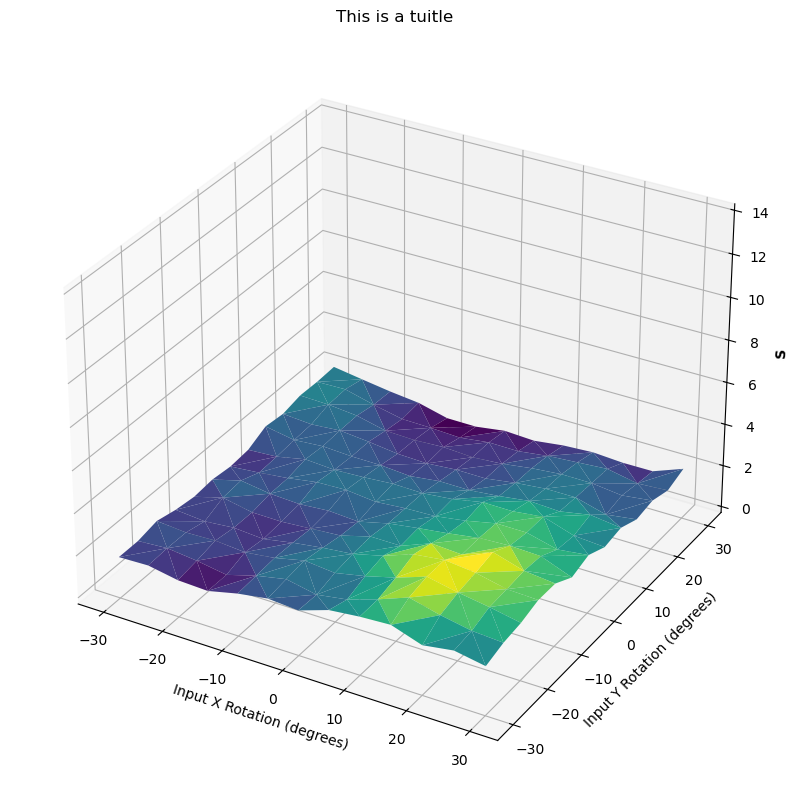

In [ ]:
sca_hu = pl.read_csv('./input_data/hu_moments-sca.csv', has_header=False)
sca_hu_ssa = apply_all_fns(sca_hu, iartd=True)
sca_hu_ssa.plot_sensitivity_surfaces(max_z=14)


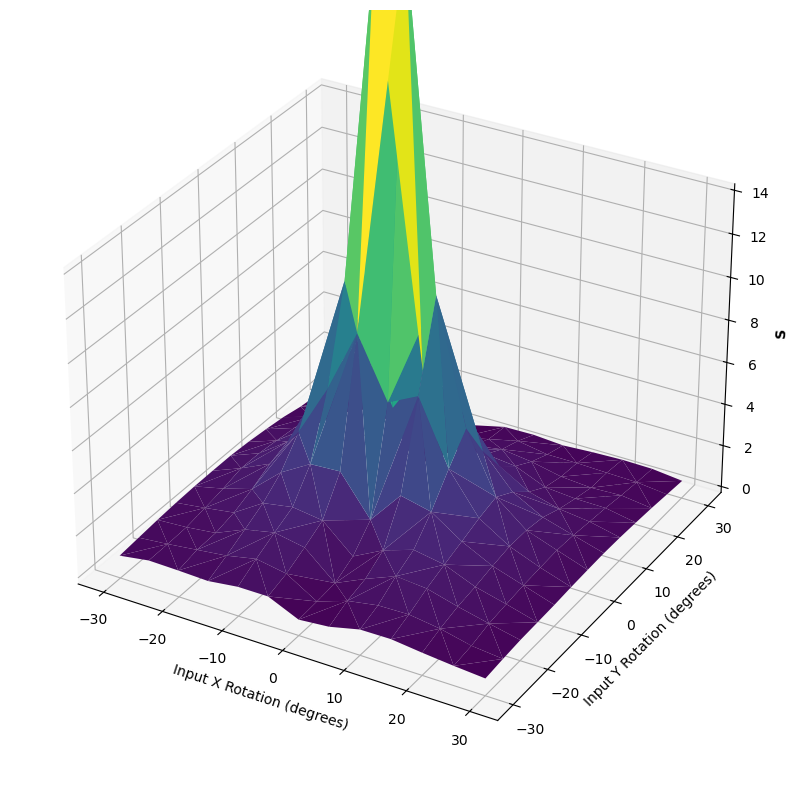

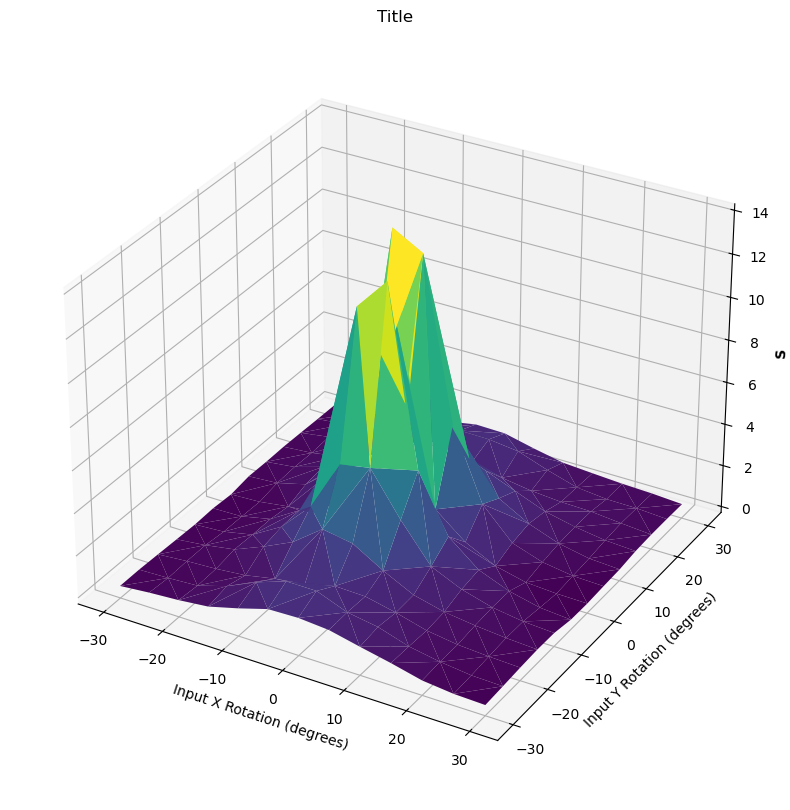

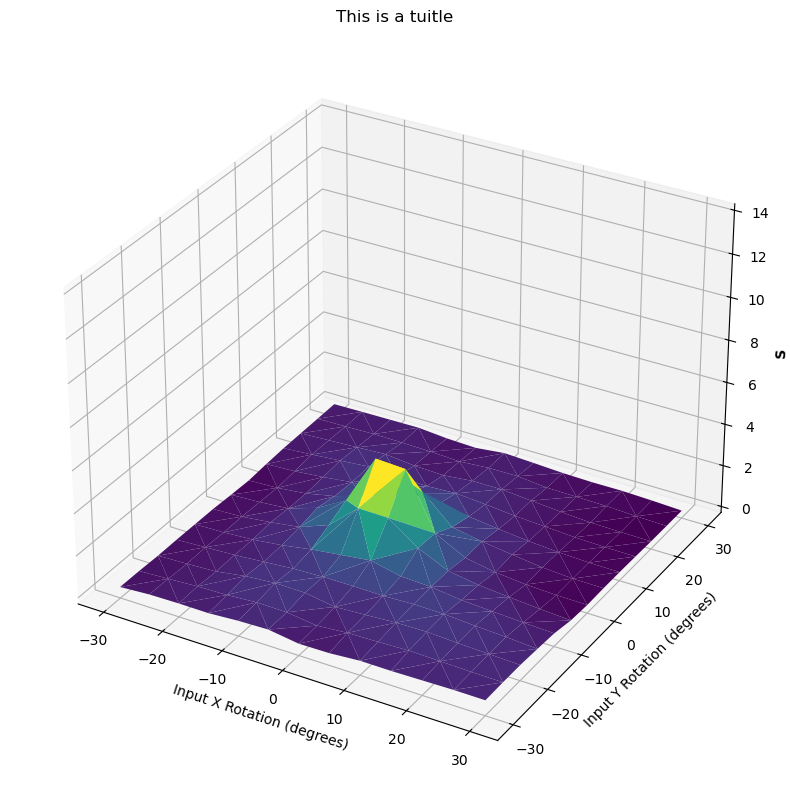

In [ ]:
fem_hu = pl.read_csv('./input_data/hu_moments-fem.csv', has_header=False)
fem_hu_ssa = apply_all_fns(fem_hu, iartd=True)
fem_hu_ssa.plot_sensitivity_surfaces(max_z=14)

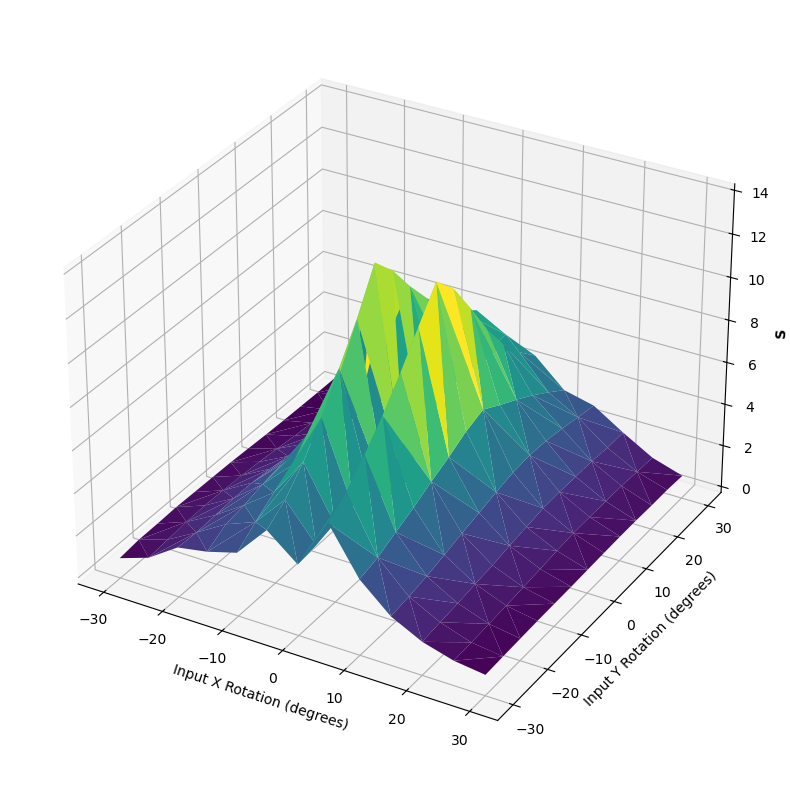

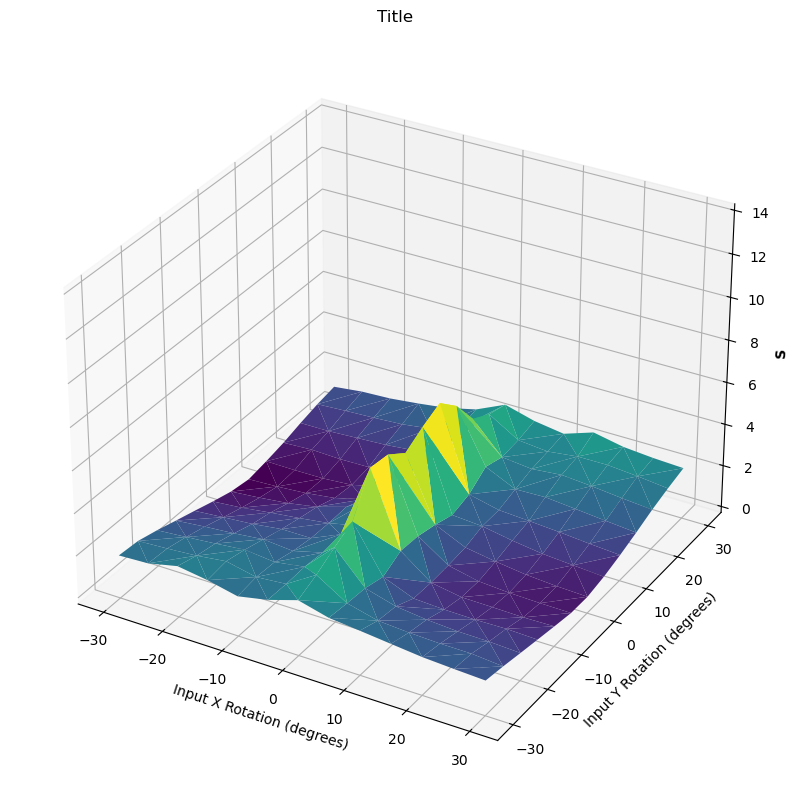

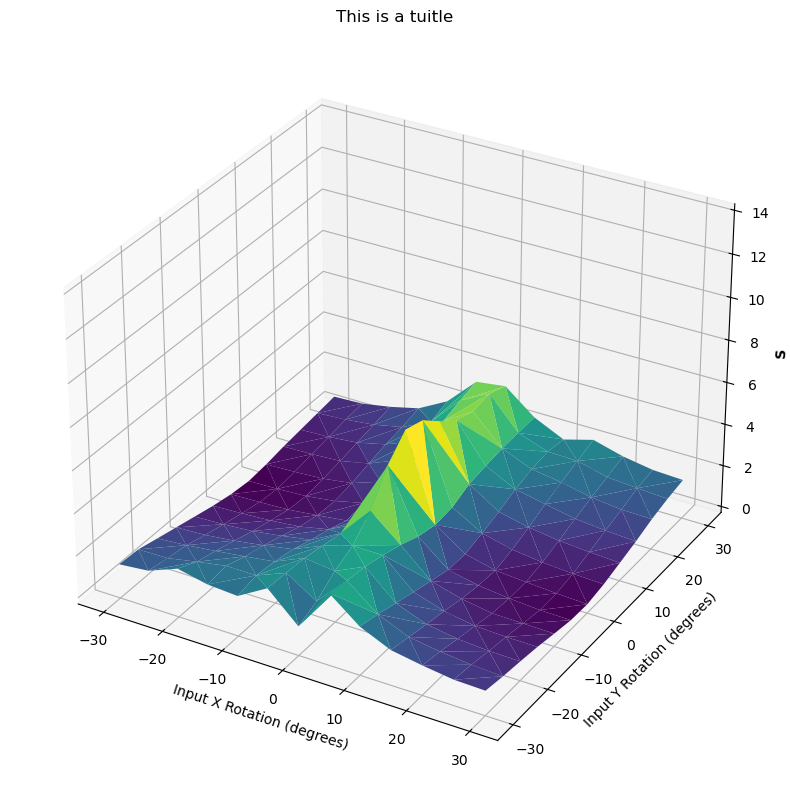

In [ ]:
tib_hu = pl.read_csv('./input_data/hu_moments-tib.csv', has_header=False)
tib_hu_ssa = apply_all_fns(tib_hu, iartd=True)
tib_hu_ssa.plot_sensitivity_surfaces(max_z=14)
